In [1]:
from graphix import Circuit
import numpy as np
import qiskit as qk
import pyzx as zx 
from fractions import Fraction
from JCZCircuit import pyZX_to_graphix, pyZX_to_gate_circuit
from graphix.pattern import measure_pauli, pauli_nodes

def compare_sequences(seq1, seq2):
    """
    Compares two sequences and finds new and missing items.
    Handles unhashable types like lists.

    :param seq1: The first sequence.
    :param seq2: The second sequence.
    :return: A tuple containing two lists - (new_items, missing_items)
    """
    new_items = [item for item in seq2 if item not in seq1]
    missing_items = [item for item in seq1 if item not in seq2]

    return new_items, missing_items



def condense_seq(seq):
    condensed_seq = []
    condensed_str = ""
    for i in seq:
        if i[0] == 'N':
            node = i[1]
            condensed_seq.append(f"N{node}")
            condensed_str += f"N{node} "

        elif i[0] == 'E':
            nodes = i[1]
            node1 = nodes[0]
            node2 = nodes[1]
            condensed_seq.append(f"E{node1},{node2}")
            condensed_str += f"E{node1},{node2} "

        elif i[0] == 'M':
            node = i[1]
            basis = i[2]
            angle = i[3]
            condensed_seq.append(f"M{node}")
            condensed_str += f"M{node} "

        elif i[0] == 'X':
            node = i[1]
            dependencies = i[2]
            condensed_seq.append(f"X{node}")
            condensed_str += f"X{node} "

        elif i[0] == 'Z':
            node = i[1]
            dependencies = i[2]
            condensed_seq.append(f"Z{node}")
            condensed_str += f"Z{node} "
    return condensed_seq , condensed_str


seq1 = [['N', 0], ['N', 1], ['N', 2], ['N', 3], ['E', (0, 2)], ['E', (2, 3)], ['M', 0, 'XY', -0.10610329539459688, [], []], ['M', 2, 'XY', 0, [], []], ['X', 3, [2]], ['Z', 3, [0]], ['N', 4], ['E', (1, 4)], ['M', 1, 'XY', 0, [], []], ['X', 4, [1]], ['N', 5], ['E', (4, 5)], ['M', 4, 'XY', 0, [], []], ['X', 5, [4]], ['N', 6], ['N', 7], ['E', (5, 6)], ['E', (3, 6)], ['E', (6, 7)], ['M', 5, 'XY', 0, [], []], ['M', 6, 'XY', 0, [], []], ['X', 7, [6]], ['Z', 7, [5]], ['Z', 3, [5]], ['N', 8], ['E', (3, 8)], ['M', 3, 'XY', 0, [], []], ['X', 8, [3]], ['N', 9], ['E', (8, 9)], ['M', 8, 'XY', 0, [], []], ['X', 9, [8]]]
condensed_seq , condensed_str= condense_seq(seq1)
#print(condensed_seq)
print(condensed_str)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


N0 N1 N2 N3 E0,2 E2,3 M0 M2 X3 Z3 N4 E1,4 M1 X4 N5 E4,5 M4 X5 N6 N7 E5,6 E3,6 E6,7 M5 M6 X7 Z7 Z3 N8 E3,8 M3 X8 N9 E8,9 M8 X9 


In [2]:
# Clifford operations are CX, CZ, X, Y, Z , H, S , SWAP, CPhase
# Non-Clifford operations are CCX, Rx, Ry, Rz, T 
nqubit = 2
circuit_doc = zx.Circuit(qubit_amount=nqubit)
circuit_doc.add_gate("ZPhase", 0, phase=Fraction(1,3))
circuit_doc.add_gate("H", 1)
circuit_doc.add_gate("CNOT", 0,1) 
circuit_doc.add_gate("H", 0)

circuit = circuit_doc 
zx.draw(circuit)
circ = pyZX_to_gate_circuit(circuit, nqubit)
print(circ)

      ┌─────────────┐     ┌───┐
q0_0: ┤ Rz(0.33333) ├──■──┤ H ├
      └────┬───┬────┘┌─┴─┐└───┘
q0_1: ─────┤ H ├─────┤ X ├─────
           └───┘     └───┘     


################################################
Wild pattern, transpiling of simple circuit
################################################
N, node = 0
N, node = 1
N, node = 2
N, node = 3
E, nodes = (0, 2)
E, nodes = (2, 3)
M, node = 0, plane = XY, angle(pi) = -0.10610329539459688, s-domain = [], t_domain = []
M, node = 2, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 3, domain = [2]
Z byproduct, node = 3, domain = [0]
N, node = 4
E, nodes = (1, 4)
M, node = 1, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 4, domain = [1]
N, node = 5
E, nodes = (4, 5)
M, node = 4, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 5, domain = [4]
N, node = 6
N, node = 7
E, nodes = (5, 6)
E, nodes = (3, 6)
E, nodes = (6, 7)
M, node = 5, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
M, node = 6, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 7, domain = [6]
Z byproduct, node = 7, 

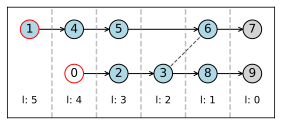

In [3]:
# Print out sequence?
print_pattern = True

# Converting pyZX to graphix object
circuit = pyZX_to_graphix(circuit, nqubit)

# Printing unoptimised pattern
print(f"################################################\nWild pattern, transpiling of simple circuit\n################################################")
pattern = circuit.transpile()

if print_pattern == True:
    pattern.print_pattern(lim=200) # show the command sequence (pattern)

nodes, _ = pattern.get_graph()
ops = len(pattern.seq)
#print(pattern.seq)
ori_seq = pattern.seq
c_seq , c_str= condense_seq(pattern.seq)

print(f"No. qubits: {len(nodes)}, No. ops: {ops}")
pattern.draw_graph(node_distance=(1,1))

################################################
Standardisation
################################################
N, node = 0
N, node = 1
N, node = 2
N, node = 3
N, node = 4
N, node = 5
N, node = 6
N, node = 7
N, node = 8
N, node = 9
E, nodes = (0, 2)
E, nodes = (2, 3)
E, nodes = (1, 4)
E, nodes = (4, 5)
E, nodes = (5, 6)
E, nodes = (6, 3)
E, nodes = (6, 7)
E, nodes = (3, 8)
E, nodes = (8, 9)
M, node = 0, plane = XY, angle(pi) = -0.10610329539459688, s-domain = [], t_domain = []
M, node = 2, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
M, node = 1, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
M, node = 4, plane = XY, angle(pi) = 0, s-domain = [1], t_domain = []
M, node = 5, plane = XY, angle(pi) = 0, s-domain = [4], t_domain = [1]
M, node = 6, plane = XY, angle(pi) = 0, s-domain = [], t_domain = [2, 4]
M, node = 3, plane = XY, angle(pi) = 0, s-domain = [2], t_domain = [0, 5]
M, node = 8, plane = XY, angle(pi) = 0, s-domain = [3], t_domain = [2]
X byproduct, node =

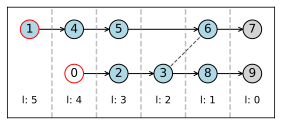

In [7]:
print(f"################################################\nStandardisation\n################################################")
pattern = circuit.transpile()
pattern.standardize()
if print_pattern == True:
    pattern.print_pattern()
nodes, _ = pattern.get_graph()
ops = len(pattern.seq)
std_seq = pattern.seq
print(f"No. qubits: {len(nodes)}, No. ops: {ops}")
new, missing = compare_sequences(ori_seq, std_seq)
print(f"New Terms: {new} \nMissing Terms: {missing}")


pauli_node, non_pauli_node = pauli_nodes(pattern, leave_input=False)
# To be measured
print(pauli_node)
# Unmeasured
print(non_pauli_node)

pattern.draw_graph()



Flow found.


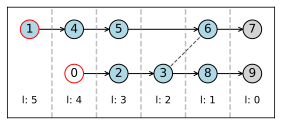

N, node = 0
N, node = 1
N, node = 3
N, node = 5
N, node = 7
N, node = 9
E, nodes = (0, 9)
E, nodes = (1, 7)
E, nodes = (1, 9)
E, nodes = (3, 9)
E, nodes = (5, 7)
E, nodes = (5, 9)
M, node = 0, plane = XY, angle(pi) = -0.10610329539459688, s-domain = [], t_domain = [], Clifford index = 6
M, node = 1, plane = XY, angle(pi) = 0, s-domain = [], t_domain = [], Clifford index = 6
M, node = 5, plane = XY, angle(pi) = 0, s-domain = [4], t_domain = [1], Clifford index = 6
M, node = 3, plane = XY, angle(pi) = 0, s-domain = [2], t_domain = [0, 5], Clifford index = 6
X byproduct, node = 9, domain = [8]
X byproduct, node = 7, domain = [6]
Z byproduct, node = 9, domain = [3]
Z byproduct, node = 7, domain = [5]
No flow found. Gflow found.


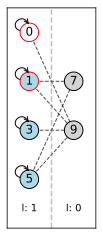

N, node = 0
N, node = 3
N, node = 7
N, node = 9
E, nodes = (0, 9)
E, nodes = (3, 9)
M, node = 0, plane = XY, angle(pi) = -0.10610329539459688, s-domain = [], t_domain = [], Clifford index = 6
M, node = 3, plane = XY, angle(pi) = 0, s-domain = [2], t_domain = [0, 5], Clifford index = 6
X byproduct, node = 9, domain = [8]
X byproduct, node = 7, domain = [6]
Z byproduct, node = 9, domain = [3]
Z byproduct, node = 7, domain = [5]
No flow found. Gflow found.


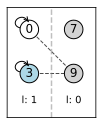

In [12]:

patternT = circuit.transpile()
patternF = circuit.transpile()
patternT.draw_graph()

patternT.perform_pauli_measurements(leave_input=True)
if print_pattern == True:
    patternT.print_pattern()
patternT.draw_graph()

patternF.perform_pauli_measurements(leave_input=False)
if print_pattern == True:
    patternF.print_pattern()
patternF.draw_graph()

In [13]:

patternT = gx.transpile()
measure_pauli(patternT, leave_input=True)
pauli_node, non_pauli_node = pauli_nodes(patternT, leave_input=False)
pauli_node, non_pauli_node = pauli_nodes(patternT, leave_input=False)
print(pauli_node, non_pauli_node)
    
patternT.draw_graph()


NameError: name 'gx' is not defined